# **8.1 Mathematical tools for image formation**

##**Intro**

Image formation is the process of projecting the elements appearing in a **3D scene** (objects, surfaces, landscapes, etc.) on a **2D image plane**. This process happens, for instance, when you are capturing an image of the real world by means of a camera, or when you are playing a first-person videogame and the 3D virtual environment of the game is projected to a plane that is shown to you as the player's view.

<table>
<tr><td><img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/intro.jpg" width="600"/></td>
    <td><img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/videogame.png" width="400"/></td>
<tr>
</table>

The *image formation* topic involves two different perspectives of the problem of generating images from 3D scenes:

- **The geometric problem:** Where does each 3D point project on the image? 
- **The radiometric problem:** What will be the color on the image of each 3D point? *(not addressed here)*

In this introductory notebook, we will see some basic mathematical tools that are required for studying image formation models as the common pinhole model. Although it might seem at first that they are not related with the problem in hand, their understanding is of capital importance when studying about elements and transformations between the 3D world and the 2D image plane. 

These tools include:

- Euclidean transformations in 3D (section 8.1.1).
  - Introducing and displaying vectors (8.1.1.1).
  - Products of 3D vectors (8.1.1.2).
  - Linear transformation of vectors (8.1.1.3).
  - Rotation matrix (8.1.1.4).
- Homogeneous transformations (8.1.2).

## **Problem context - Camera in first-person videogames** 

In video games, it is called *first person* to any graphical perspective rendered from the viewpoint of the player's character, or a viewpoint from the cockpit or front seat of a vehicle driven by the character. Many genres incorporate first-person perspectives, including adventure games, driving, sailing, and flight simulators. Perhaps the more extended are first-person shooters, in which the graphical perspective is an integral component of the gameplay.

Usually, when someones plays a first-person computer game, the `WASD` keys of our keyboard are used to move the camera position in the $x$ and $z$ axes (planar movement) and `SPACE` is used for jumping (this moves the camera in the $y$ axis, hence allowing it to move in 3D). Then, the mouse is used for changing the camera orientation (this applies *pitch* and/or *yaw* rotations to the camera coordinate system). The combination of 3D movement and 3D rotations creates a full 6D movement control for our character!

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/first_person.jpg" width="500"/>$\\[3pt]$
</center>

Our task in this notebook is **to program these camera displacements and rotations so they can be integrated into a graphic engine!**. Obviously, this implies learning all the maths involved in here, and most of them are related to the manipulation of vectors and matrices. So, let's start the fun!

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from ipywidgets import interact, fixed, widgets
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, radians
# %matplotlib notebook
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

images_path = '/gdrive/My Drive/Colab Notebooks/Chapter 8. Image formation/images/'

## **8.1.1 3D Euclidean transformations**

### **8.1.1.1 Introducing and displaying vectors**

Since we are going to employ lots of vectors in this notebook (and the following ones), first of all, we need to know how vectors are defined and how to transform them.

A free vector $\mathbf{v}$ can be defined as a mathematical entity represented as an *oriented segment* between two points $\{\mathbf{p},\mathbf{q}\}$:

$\hspace{2cm} \mathbf{p} = \begin{bmatrix} p_1 \\ p_2 \\ p_3\end{bmatrix} \in \mathbb{R}^3, \ \mathbf{q} = \begin{bmatrix} q_1 \\ q_2 \\ q_3 \end{bmatrix} \in \mathbb{R}^3 \\[5pt]$

whose elements (in 3D) can be computed as:

$\hspace{2cm} \mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3\end{bmatrix} = \begin{bmatrix} q_1  - p_1 \\ q_2 - p_2  \\ q_3 - p_3 \end{bmatrix} \in \mathbb{R}^3$

Note from the notation in $\mathbf{p}$, for example, that a vector can also represent the coordinates of a certain point with respect to the origin of coordinates. In fact, in this notebook, we will use vectors to refer to several entities such as points, axes or even transformation (translations). 

Thus, it is important to know how to draw them, in order to have a visual reference of what we are using! In python, we can plot a set of 3D vectors using matplotlib's method [`quiver()`](https://matplotlib.org/3.1.1/gallery/mplot3d/quiver3d.html), which takes 6 main arguments:

- `X,Y,Z`: tuples containing the *X*, *Y* and *Z* coordinates of the origin point in the set of vectors.
- `U,V,W`: tuples containing the *X*, *Y* and *Z* coordinates of all vectors w.r.t. such origin point.

The next code illustrates how to plot two free vectors $\mathbf{v}_1 = (2,1,1)$, and $\mathbf{v}_2 = (0,1,2)$, with origin point $\mathbf{p}=(1,1,1)$

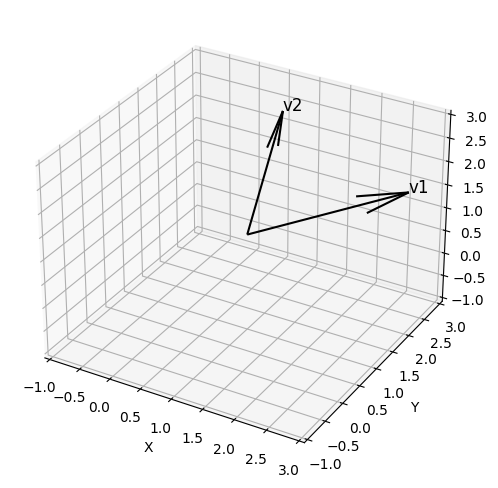

In [25]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Vector coordinates
v = np.array([[2,0],
              [1,1],
              [1,2]])

# Vector labels
labels = ["v1","v2"]

# Origin coordinates
origin = np.array([[1,1],
                   [1,1],
                   [1,1]])

# Prepare vector for plotting input
X,Y,Z = origin[0,:], origin[1,:], origin[2,:]
U,V,W = v[0,:], v[1,:], v[2,:]

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = plt.axes(projection='3d')

# Set axes limits
ax.set_xlim3d(-1, 3)
ax.set_ylim3d(-1, 3)
ax.set_zlim3d(-1, 3)

# Add axis labels and aspect ratio
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot vectors
ax.quiver(X, Y, Z, U, V, W, color="black")

# Add labels
for i in range(len(labels)):
    ax.text(U[i]+X[i], V[i]+Y[i], W[i]+Z[i] ,labels[i], fontsize=12)

# And show the figure!
plt.show()

#### <font color="green"><b>ASSIGNMENT #1: Function to display vectors</b></font>

Let's convert this code in a method we can use later. Your first task is to define the method called `plot_vectors()`, which returns a figure plotting a number of input free vectors as defined in `v` with a given `origin` and axes `labels`. 

*Note that:*

- *This function also expects as inputs a figure and some axes. This permits us to call the method **multiple times** reusing the same figure.*
- *The first time that the method is called, the axes must be previously initialized outside the method using [ax = plt.axes(projection='3d')](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html).*
- *You also have to permit to introduce the axes limits as argument, to select the area of the plot we want to see.*

In [21]:
# ASSIGNMENT 1
def plot_vectors(fig, ax, v, origin, labels, color, axes_lim):
    """ Plot 3D vectors using matplotlib
        
        Args:
            fig     : [.] figure handle
            ax      : [.] axes handle (must be 3D)
            v       : [numpy array] array containing vector coordinates, each column contains a 3D vector
            origin  : [numpy array] array containing vector origin points for 'v' array
            labels  : [list] list of strings containing the labels for the vectors, it should have same length than columns in 'v'
            color   : [string] color of the vectors
            axes_lim: [numpy array] 6-size vector containing the minimum and maximum limits for each axis [X_min,X_max,X_min,X_max,Z_min,Z_max]
        
        Returns: 
            fig, ax : Figure and axis of a 3D plot with the vectors plotted
    """   
    # Write your code here
    X,Y,Z = origin[0,:], origin[1,:], origin[2,:]
    U,V,W = v[0,:], v[1,:], v[2,:]
    
    # Set axes limits
    ax.set_xlim3d(axes_lim[0],axes_lim[1])
    ax.set_ylim3d(axes_lim[2],axes_lim[3])
    ax.set_zlim3d(axes_lim[4],axes_lim[5])

    # Add axis labels and aspect ratio
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # ax.set_aspect('equal')

    # Plot vectors
    ax.quiver(X, Y, Z, U, V, W, color=color)

    # Add labels
    for i in range(len(labels)):
        ax.text(U[i]+X[i], V[i]+Y[i], W[i]+Z[i] ,labels[i], fontsize=10,color=color)


    return fig, ax

To **test your function**, the next code should show an orthonormal basis (unit vectors) centered at $\mathbf{p}_0=(0,0,0)$.


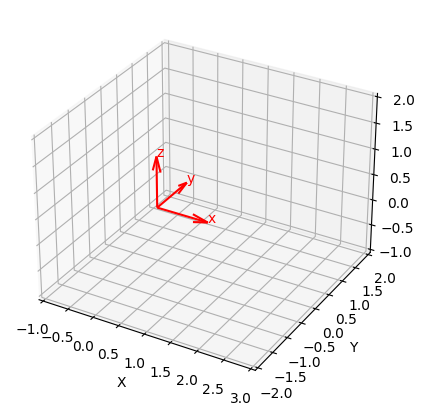

In [45]:
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = plt.axes(projection='3d')

# Vector coordinates
v = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

# Origin coordinates
origin = np.array([[0,0,0],
                   [0,0,0],
                   [0,0,0]])

# Vector labels
labels = ["x","y","z"]

# Call plot_vectors
fig, ax = plot_vectors(fig, ax, v, origin, labels, "red", [-1,3,-2,2,-1,2])

fig.show()

##### **<font color=red><b>Expected output</b></font>**

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/ortho_base.png" width="350"/>$\\[3pt]$
</center>

### **8.1.1.2 Product of 3D vectors**

Now that you know how to define and plot a set of vectors, you are ready to learn two basic operations with them: the **dot** and **cross** products.

-- **Dot product of two vectors**

The dot product (also called scalar product or inner product) of two vectors is the sum of the element-wise product between them, which results in a **scalar**.

- ***Algebraic definition:***

$$ \mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix} \;\;\;\;\;\;  \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}$$

$$\langle\mathbf{a},\mathbf{b}\rangle = \mathbf{a} \cdot \mathbf{b} = \mathbf{a}^\texttt{T}\mathbf{b} = \texttt{trace}(\mathbf{a} \, \mathbf{b}^\texttt{T}) = a_1b_1 + a_2b_2 + a_3b_3 \in \mathbb{R}$$

The dot product is involved in the definition of the **Euclidean norm** of a vector, which, geometrically, represents the distance between the two points that delimits the vector:

$$\|\mathbf{a}\| = \sqrt{\mathbf{a}^\texttt{T}\mathbf{a}} = \sqrt{a_1^2 + a_2^2 + a_3^2}$$

- ***Geometric definition:*** From a geometric point of view, the dot product of two vectors $\mathbf{a}$ and $\mathbf{b}$ is defined by:

$$ \mathbf{a}\cdot \mathbf{b} = \| \mathbf{a}\| \, \|\mathbf{b}\| \cos \theta$$

where $\theta$ is the angle between both vectors. That is, the dot product represents the product of their Euclidean norms and the cosine of the angle between them. Such a definition can be rearranged to calculate the projection of one vector onto the other as shown in the figure: $\\[5pt]$

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/dot.png" width="300" align="center"/>
</center>



#### **<font color="green"><b>ASSIGNMENT #2: Using the dot product</b></font>**

Compute the **dot product** of two vectors: $\mathbf{a}=(0,2,4)$ and $\mathbf{b}=(2,3,2)$ using the described **algebraic** method and check that you get the same result than using `np.dot()`. Then compute the norm of the second vector and the projection of the first vector onto the second one. Check that you get the same norm than using `np.linalg.norm()`.

In [73]:
# ASSIGNMENT #2: dot product with Algebraic method vs 'dot' function
# Write your code here!
# Define vectors
from numpy.linalg import norm
import math
a = np.array([0,2,4])
b = np.array([2,3,2])
dot_prod = 0

# Dot product two methods
for i in range(np.size(a)):
    dot_prod = dot_prod + a[i]*b[i]

dot_prod1 = np.dot(a,b)

print("𝐚 · 𝐛  (algebraic method):",dot_prod,"\n𝐚 · 𝐛  (dot function): ",dot_prod1)

# the norm of the second vector two methods
norm_b = norm(b, 2)

norm_b1 = math.sqrt((2**2 + 3**2 + 2**2)) 
print("||𝐛||  (norm function):",f"{norm_b:0,.4f}","\n||𝐛||  (formula):", f"{norm_b1:0,.4f}")

# Projection two methods
r = 0
for i in range(np.size(b)):
    r = r + b[i]**2

proje = dot_prod/r**0.5
proje1 = dot_prod1/np.linalg.norm(b)

print("\nProjection of 𝐚 onto  𝐛 algebraic method :",f"{proje:0,.4f}","\nProjection of 𝐚 onto  𝐛 np.linalg.norm(): ",f"{proje1:0,.4f}")

𝐚 · 𝐛  (algebraic method): 14 
𝐚 · 𝐛  (dot function):  14
||𝐛||  (norm function): 4.1231 
||𝐛||  (formula): 4.1231

Projection of 𝐚 onto  𝐛 algebraic method : 3.3955 
Projection of 𝐚 onto  𝐛 np.linalg.norm():  3.3955


##### **<font color=red><b>Expected output</b></font>**
$\mathbf{a}$·$\mathbf{b}$ (algebraic method): $14$

$\mathbf{a}$·$\mathbf{b}$ (`dot` function): $14$

$||\mathbf{b}||$ (formula): $4.1231$

$||\mathbf{b}||$ (`norm` function): $4.1231$

Projection of $\mathbf{a}$ onto $\mathbf{b}$ = $3.3955$

-- **Cross product of two vectors**

The cross product (also called vector product) of two linearly independent vectors $\mathbf{a}$ and $\mathbf{b}$ is a linear transformation which results in **another vector** $\mathbf{c}$ perpendicular to both, and thus to the plane containing them. Given two vectors:$\\[5pt]$

$$ \mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix} \hspace{1cm} \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \\[5pt]$$

Their cross product is defined as:
$$ \mathbf{c} = \mathbf{a} \times \mathbf{b} = \begin{vmatrix}
i & j & k \\
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3
\end{vmatrix}
= 
(a_2 b_3 \mathbf{i} + a_3 b_1 \mathbf{j} + a_1 b_2 \mathbf{k}) - (a_3 b_2 \mathbf{i} + a_1 b_3 \mathbf{j} + a_2 b_1 \mathbf{k})
= 
(a_2 b_3 - a_3 b_2)\mathbf{i} + (a_3 b_1 - a_1 b_3)\mathbf{j} + (a_1 b_2 - a_2 b_1)\mathbf{k}
$$

Although it is more convenient to express it as a linear transformation using matrix multiplication:

$$ \mathbf{c} = \mathbf{a} \times \mathbf{b} 
= [\mathbf{a}]_\times\mathbf{b} \hspace{1.5cm} / \hspace{1.5cm} [\mathbf{a}]_\times = \begin{bmatrix} 0 & -a_3 & a_2 \\ a_3 & 0 & -a_1 \\ -a_2 & a_1 & 0\end{bmatrix}  \in \mathbb{R}^3$$

where $[\mathbf{a}]_\times$ is called the *skew-symmetric* matrix of $\mathbf{a}$.

The norm of the resultant vector is computed as:

$$ \|\mathbf{c}\| = \|\mathbf{a}\| \, \|\mathbf{b}\| \sin \theta$$

This has an interesting **geometric meaning**: the norm of the cross product of two vectors $\mathbf{a}$ and $\mathbf{b}$ can be interpreted as the area of the parallelogram that has such vectors as sides. Also, as mentioned before, the resulting vector is orthogonal to both $\mathbf{a}$ and $\mathbf{b}$ vectors.

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/cross.png" width="200" align="center"/>
</center>

#### **<font color="green"><b>ASSIGNMENT #3: Applying the cross product</b></font>**

Compute the cross product of the previous $\mathbf{a}$ and $\mathbf{b}$ vectors using the skew-symmetric matrix of $\mathbf{a}$ and check that you get the same result as using `np.cross()`. Then plot $\mathbf{a}$ and $\mathbf{b}$ as black vectors and their cross product $\mathbf{c}$ in red using your previous method `plot_vectors()`.

> <font color="orange">Tip: In `NumPy`, **matrix multiplication** is defined with the `@` operator (`A @ B`) instead of the `*` operator, which performs element-wise matrix multiplication. To transform a horizontal vector (row) to a vertical vector (column) you can use [`np.vstack`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html).</font>

> <font color="orange">Tip: Be careful with the dimensions of the vectors. Sometimes after a multiplication you will get a vector whose `NumPy` shape is `(3,)` , a you will need something like `(3,1)`. Use [`reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to fix this.</font>

Using skew-symmetric matrix:  𝐜=𝐚×𝐛=: [-8  8 -4] 
Using 'cross' method:  𝐜=𝐚×𝐛=:  [-8  8 -4]


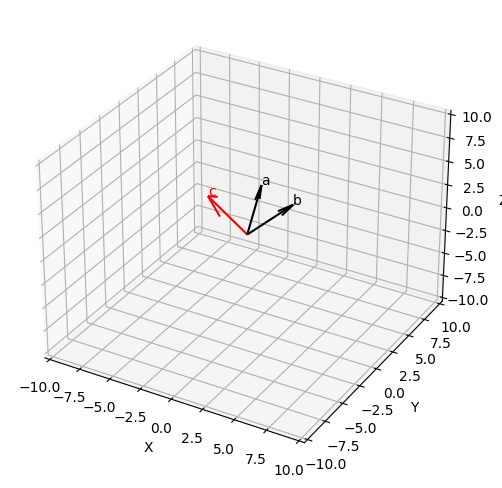

In [75]:
# ASSIGNMENT #3: cross product with skew-symmetric matrix and using the 'cross' method
# Write your code here!
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Define vectors
a = np.array([0,2,4])
b = np.array([2,3,2])
ax = np.asarray([[0, -a[2], a[1]],[a[2], 0, -a[0]], [-a[1], a[0], 0]])

# Cross product computation
c = ax@b
c2 = np.cross(a,b)

print("Using skew-symmetric matrix:  𝐜=𝐚×𝐛=:",c,"\nUsing 'cross' method:  𝐜=𝐚×𝐛=: ",c2)

# Show vectors

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = plt.axes(projection='3d')
   
# Vector coordinates
v = np.hstack([np.vstack(a),np.vstack(b)])

# Origin coordinates
origin = np.array([[0,0],[0,0],[0,0]])

# Vector labels
labels = ["a","b"]

# Call plot_vectors
fig, ax = plot_vectors(fig, ax, v, origin, labels, "black", [-10,10,-10,10,-10,10])

# Vector labels 2
labels2 = ["c"]

# Vector coordinates 2
v2 = np.hstack([np.vstack(c)])

# Origin coordinates
origin2 = np.array([[0],[0],[0]])

# Call plot_vectors
fig, ax = plot_vectors(fig, ax, v2, origin2, labels2, "red", [-10,10,-10,10,-10,10])

fig.show()

##### **<font color=red><b>Expected output</b></font>**

Using *skew-symmetric* matrix: $\mathbf{c} = \mathbf{a} \times \mathbf{b} = [-8,8,-4]$

Using 'cross' method: $\mathbf{c} = \mathbf{a} \times \mathbf{b} = [-8,8,-4]$

-- **Extra: product of three vectors**

The product of three vectors (or scalar triple product) is a combination of the two previous ones: it is defined as the dot product of a vector $\mathbf{c}$ with the cross product of the other two, namely $\mathbf{a}$ and $\mathbf{b}$, that is:

$$(\mathbf{a} \times \mathbf{b}) \cdot \mathbf{c}$$

This product also has a **geometric meaning**: it is the (signed) volume of the parallelepiped defined by those vectors:$\\[10pt]$

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/triple.png" width="250"/>$\\[3pt]$
</center>

#### **<font color="green"><b>ASSIGNMENT #4: Applying the triple product</b></font>**

Compute the triple product of $\mathbf{a}=(1,2,3)$, $\mathbf{b}=(3,1,2)$ and $\mathbf{c}=(2,2,1)$:

> <font color="orange">Note that $\mathbf{c} \cdot (\mathbf{a} \times \mathbf{b}) = \mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})$</font>

In [79]:
# ASSIGNMENT #4: triple product
# Write your code here!

a = np.array([1,2,3])
b = np.array([3,1,2])
c = np.array([2,2,1])


trip = np.dot(a,np.cross(b,c))
trip1 = np.dot(c,np.cross(a,b))

print("Triple product: a · (b x c) = ",trip,"\nTriple product: c · (a x b) = ",trip1)

Triple product: a · (b x c) =  11 
Triple product: c · (a x b) =  11


##### **<font color=red><b>Expected output</b></font>**

   Triple product: $\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c}) = 11$
   
   Triple product: $\mathbf{c} \cdot (\mathbf{a} \times \mathbf{b}) = 11$

### **8.1.1.3 Linear transformation of vectors**

As we saw before, the cross product of two vectors is a linear transformation, i.e., a linear function that transforms the elements of the involved vectors. But the cross product is just one particular case of linear transformation where the matrix that defines such linear function is created from the elements of a vector. A more general definition for linear transformations in the 3D-space would be:

$$\mathbf{A}\mathbf{v} = \begin{bmatrix} a_1 & a_2 & a_3 \\ a_4 & a_5 & a_6 \\ a_7 & a_8 & a_9 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \\ v_3\end{bmatrix} =  \begin{bmatrix} a_1v_1 + a_2v_2 + a_3v_3 \\ a_4v_1 + a_5v_2 + a_6v_3 \\ a_7v_1 + a_8v_2 + a_9v_3\end{bmatrix}$$

Note that we can stack a set of $N$ **column** vectors $\{\mathbf{v}_i\}$ forming a $3\times N$ matrix $\mathbf{V}$ so that the linear transformation is applied to every individual vector. The resulting matrix will be a **stack of transformed column vectors**.

$$\mathbf{A}\mathbf{V} = \mathbf{A}\begin{bmatrix} \mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_N\end{bmatrix} = \begin{bmatrix} \mathbf{A}\mathbf{v}_1 & \mathbf{A}\mathbf{v}_2 & \cdots & \mathbf{A}\mathbf{v}_N \end{bmatrix}$$

This property will be extremelly useful when implementing transformations that must be applied to a large number of points.

But, what means that a operation (in this case a matrix multiplication) is linear? It means that the following two properties hold:

- **Aditivity:** $f(\mathbf{x}_1 + \mathbf{x}_2) = f(\mathbf{x}_1) + f(\mathbf{x}_2)$$\\[5pt]$
- **Scaling:** $f(\alpha \mathbf{x}_1) = \alpha f(\mathbf{x}_1)$

And, equivalently, the superposition principle also holds:

- **Superposition:** $f(\alpha \mathbf{x}_1 + \beta \mathbf{x}_2) = \alpha f(\mathbf{x}_1) + \beta f(\mathbf{x}_2)$ 

Luckily, matrix multiplication satisfies this property!

$$\mathbf{A}(\alpha \mathbf{x}_1 + \beta \mathbf{x}_2) = \alpha \mathbf{A} \mathbf{x}_1 + \beta \mathbf{A} \mathbf{x}_2 = \alpha \mathbf{y}_1 + \beta \mathbf{y}_2$$

that is, the transformation of linear combinations of vectors $(\alpha \mathbf{x}_1 + \beta \mathbf{x}_2)$ is the linear combination of the transformed vectors $(\alpha \mathbf{y}_1 + \beta \mathbf{y}_2)$. The following figure shows an example of this property in action, given two vectors and a matrix.

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/linear.png" width="800" align="center"/>
</center>

#### **<font color="green"><b>ASSIGNMENT #5: Working with linear transformations</b></font>**

Implement a function `apply_transformation()`, which transforms a set of vectors `v` according to a certain input transformation, and then shows the original vectors in black and the transformed ones in red. **Reuse the method** `plot_vectors` for this assignment.

> <font color="orange">Note: The labels for the transformed vectors should be the same that for the originals (but shown in red).</font>

In [80]:
# ASSIGNMENT #5
def apply_transformation(transformation, v, origin, labels, axes_lim):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            transformation  : [numpy array] 3x3 matrix that defines the linear transformation
            v               : [numpy array] array containing vector coordinates, each column contains a 3D vector
            origin          : [numpy array] array containing vector origin points for 'v' array
            labels          : [list] list of strings containing the labels for the vectors, it should have same length than columns in 'v'
            axes_lim        : [numpy array] 6-size vector containing the minimum and maximum limits for each axis [X_min,X_max,X_min,X_max,Z_min,Z_max]

        Returns: 
            None
    """   
    # Write your code here!
    
    v_trans = transformation @ v

    # Plot
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    fig, ax = plot_vectors(fig, ax, v, origin, labels,  "black", axes_lim)
    fig, ax = plot_vectors(fig, ax, v_trans, origin, labels,  "red", axes_lim)

You can use the next code **to test if your results are correct**:

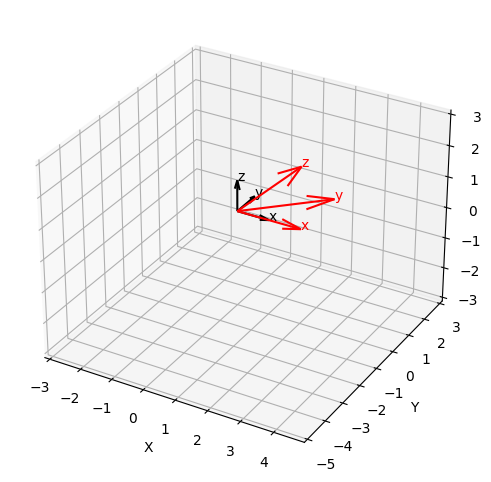

In [101]:
# Transformation
transformation = [[2,2,2],
                  [0,2,0],
                  [0,0,2]]

# Vector coordinates
v = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

# Origin coordinates
origin = np.array([[0,0,0],
                   [0,0,0],
                   [0,0,0]])

apply_transformation(transformation,v,origin,["x","y","z"],[-3,4.75,-5,3,-3,3])

##### **<font color=red><b>Expected output</b></font>**

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/example_transformation.png" width="500" align="left"/>
</center>

### **8.1.1.4 Rotation matrixes**

A rotation matrix represents a special linear transformation that rotates vectors preserving their length.

$$
\mathbf{R} = 
\begin{bmatrix} 
r_{11} & r_{12} & r_{13} \\ 
r_{21} & r_{22} & r_{23} \\ 
r_{32} & r_{32} & r_{33} \end{bmatrix} 
= \underbrace{[r_x \ r_y \ r_z]}_{\text{coordinates of the original}\\ \text{basis in the new one}} \in \mathbb{R}^{3x3}
$$

In this way, let's say that we have a certain vector $\mathbf{p}^W$ that represents the coordinates of a point in a certain reference system that we will call `WORLD` (note the superscript): $\mathbf{p}^W=[p_x,p_y,p_z]^\texttt{T}$. Now, we can rotate it around the origin of coordinates and obtain its new coordinates through:

$$
{\mathbf{p}'^W} = \mathbf{R}\mathbf{p}^W 
\ \ \rightarrow \ \ 
\begin{bmatrix} 
p_x' \\ p_y' \\ p_z' 
\end{bmatrix} 
= 
\mathbf{R} 
\begin{bmatrix} 
p_x \\ p_y \\ p_z 
\end{bmatrix}
$$

If we go back to our graphical engine for the videogame, this could correspond to the case of **a point rotating around the camera**, and it is called **active rotation**, because it is the point who is rotating around the reference system.

But we can use the rotation matrix not only to rotate points but also to **express rotations between different reference systems**. Imagine now that we have two coordinate systems: a global one, which we will call `WORLD` (`{Q}`in the figure) and a local one, which we will denote by `CAMERA` (`{P}` in the figure). The `CAMERA` reference system is rotated w.r.t. the `WORLD` according to a certain rotation matrix $\mathbf{R}^W_C$. *Note: The subscript and superscript in the notation of the $\mathbf{R}^W_C$ matrix indicates that it must be understood as the rotation of the `CAMERA` reference frame as seen from the `WORLD` one*.

Now, imagine we have a certain point $\mathbf{p}^C$ with coordinates in the `CAMERA` reference system $\mathbf{p}^C=[p_x,p_y,p_z]^\texttt{T}$ and we want to know its coordinates $\mathbf{q}^W=[q_x,q_y,q_z]^\texttt{T}$ **within** the `WORLD`. 

<table>
    <tr><td><img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/rotation.png" width="300" align="center"/></td></tr>
    <tr><td><center>Figure 1</center></td></tr>
</table>

Well, this can be computed with the exact same equation!:
$$
\mathbf{q}^W = \mathbf{R}^W_C\mathbf{p}^C \rightarrow 
\begin{bmatrix} 
q_x \\ q_y \\ q_z 
\end{bmatrix} = 
\mathbf{R}^W_C
\begin{bmatrix} 
p_x \\ p_y \\ p_z 
\end{bmatrix}
$$

To understand this, let's have a look to the figure above. Note that determining the coordinates of the blue point within the global reference system (in black) is the same that rotating the blue point within the local reference system (in orange) and getting its new coordinates, and that's why they are computed exactly the same way!

But one step further, imagine that we want now to do exactly the **opposite**, that is, knowing the value of the global coordinates $\mathbf{q}^W$, obtaining the local coordinates $\mathbf{p}^C$ in the rotated reference system. In this case we can use the **inverse of the rotation matrix** to obtain them:
$$
\mathbf{p}^C = \left(\mathbf{R}^W_C\right)^{-1}\mathbf{q}^W = 
\left(\mathbf{R}^W_C\right)^\texttt{T}\mathbf{q}^W = 
\left(\mathbf{R}^C_W\right)\mathbf{q}^W
\rightarrow 
\begin{bmatrix} 
p_x \\ p_y \\ p_z 
\end{bmatrix} = 
\mathbf{R}^\texttt{T}
\begin{bmatrix} 
q_x \\ q_y \\ q_z 
\end{bmatrix}
$$

In this case, we can understand this as if the point was **static** in the environment and it is the camera (or the player point-of-view, if you want) which is rotating within it. This is called **passive rotation**.

> <font color="orange"><b>Note</b>: It is <b>really important</b> to understand that, in these equations, $\mathbf{R}^W_C$ represents the rotation of the `CAMERA` reference system with respect to the `WORLD` reference system while $\mathbf{R}^C_W$ represents the other way around.</font>

You might also have noticed in this equation that we wrote that $\left(\mathbf{R}^W_C\right)^{-1} = \left(\mathbf{R}^W_C\right)^\texttt{T}$, and that is because rotation matrices are **orthogonal**, hence fulfilling these two properties:

- Its inverse equals its transpose: $\mathbf{R}^\texttt{T}\mathbf{R} = \mathbf{R}\mathbf{R}^\texttt{T} = \mathbf{I} \rightarrow \mathbf{R}^\texttt{T} = \mathbf{R}^{-1}$
- $\mathbf{R}$ also verifies that $\ \texttt{det}(\mathbf{R}) = +1$

> <font color="orange"><b>Note</b>: So, remember, if $\mathbf{R}$ is the rotation matrix between systems `A` and `B`, then $\mathbf{R}^\texttt{T}$ is the rotation matrix between system `B` and `A`.</font>



Focusing now on rotations in 3D-space, we can define **three elemental rotations**, one in each axis $Z$, $Y$ and $X$, denoted by *yaw*, *pitch* and *roll*, respectively:

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/rotation_plane.png" width="500" align="center"/>
</center>

These elemental rotations are represented by three different matrices:

$\hspace{2cm}\mathbf{R}_z(\theta) = \begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix} \hspace{1cm} \mathbf{R}_y(\theta) = \begin{bmatrix} cos\theta & 0 & sin\theta \\ 0 & 1 & 0 \\ -sin\theta & 0 & cos\theta \end{bmatrix} \hspace{1cm} \mathbf{R}_x(\theta) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos\theta & -sin\theta \\ 0 & sin\theta & cos\theta \end{bmatrix}\\[5pt]$

> <font color="orange"><b>Note</b>: These elemental rotation matrices keep static the transformation in a certain axis, (e.g. pitch rotation does not modify the $y$ values).</font>

Using each one of these matrices rotates a vector in one axis, but **what if we want to perform more than one rotation at a time?** Well, we just need to multiply them in a certain order!

$$
\mathbf{R}
= 
\begin{bmatrix} 
r_{11} & r_{12} & r_{13} \\ 
r_{21} & r_{22} & r_{23} \\ 
r_{31} & r_{32} & r_{33} 
\end{bmatrix} 
= 
\mathbf{R}_z(\alpha)\mathbf{R}_y(\beta)\mathbf{R}_x(\theta) 
$$

where $\alpha$ = *yaw* angle, $\beta$ = *pitch* angle and $\theta$ = *roll* angle.

**But why the order of the multiplication matters?** Because matrix multiplication is not commutative! The are several different orders how these matrices can be multiplied but the one presented here (i.e. $Z-Y-X$) is one of the most used (e.g. robotics, airbone navigation, etc.). 

This sequence means that:
- First, the original reference system is rotated a certain $\alpha$ angle around its $Z$ axis, 
- Then the resulting (**rotated**) system is rotated again a certain $\beta$ angle around its **rotated** $Y'$ axis
- And finally it is rotated again a certain $\theta$ angle around its **rotated** $X''$ axis.

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/rotation_order.png" width="900" align="center"/>
</center>

Note that each rotation is applied to the rotated axis (this is called *intrinsic* rotation) and it is performed through **post-multiplication**. If we wanted to rotate around the original (unrotated axis) we would have used pre-multiplication (this is called *extrinsic* rotation). In general this second approach is less intuitive and the first one is preferred. So, just keep the stated order when multiplying elemental rotations.

**Wait, but, what about translations?**

If we focus on general transformations between reference systems, you can imagine that **usually cameras are not placed at the center of the `WORLD` coordinate system**, but they are moving within the world, that is, they don't share their origin of coordinates. That means that the camera is also translated w.r.t. the `WORLD` reference system, so we have to include a translation vector $\mathbf{t}^W_C$ in order to be able to transform points between the two reference frames, not only rotate them!

Let's go back to Figure 1 and update it with a more general transformation (remember, {Q} is the `WORLD` reference system and {P} is the `CAMERA` one):
<table>
    <tr><td><img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/rotation_and_translation.png" width="300" align="center"/></td></tr>
    <tr><td><center>Figure 2</center></td></tr>
</table>

Now that the transformation between the systems **includes a translation**, we have that:
$$\mathbf{q}^W = \mathbf{R}^W_C \mathbf{p}^C + \mathbf{t}^W_C$$

$$ \begin{bmatrix} q_x \\ q_y \\ q_z \end{bmatrix} 
= 
\begin{bmatrix} 
r_{11} & r_{12} & r_{13} \\ 
r_{21} & r_{22} & r_{23} \\ 
r_{31} & r_{32} & r_{33} 
\end{bmatrix} 
\begin{bmatrix} p_x \\ p_y \\ p_z 
\end{bmatrix} 
+ 
\begin{bmatrix} t_x \\ t_y \\ t_z \end{bmatrix}
$$

Again, in this equation $\mathbf{R}^W_C$ and $\mathbf{t}^W_C$ express the rotation and translation, respectively, of the `CAMERA` reference system w.r.t. the `WORLD` one, that is, the position and orientation of the `CAMERA` within the `WORLD`.	

#### **<font color="green"><b>ASSIGNMENT #6: Rotating and translating</b></font>**
 
Now, we are going to implement the `apply_rotation_translation()` method, which accepts `yaw`, `pitch` and `roll` rotation angles (in degrees) and a translation vector and applies such transformations to an input vector.

> <font color="orange">Tip: you can transform degrees to radians using [`radians()`](https://www.geeksforgeeks.org/degrees-and-radians-in-python/).</font>

In [102]:
# ASSIGNMENT #6
def apply_rotation_translation(v, origin, yaw, pitch, roll, translation, labels, axes_lim):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            v               : [numpy array] array containing vector coordinates, each column contains a 3D vector
            origin          : [numpy array] array containing vector origin points for 'v' array
            yaw             : [float] degrees to rotate the coordinate system around the 'Z' axis 
            pitch           : [float] degrees to rotate the coordinate system around the 'Y' axis 
            roll            : [float] degrees to rotate the coordinate system around the 'X' axis 
            translation     : [numpy array] column vector containing the translation for each axis
            labels          : [list] list of strings containing the labels for the vectors, it should have same length than columns in 'v'
            axes_lim        : [numpy array] 6-size vector containing the minimum and maximum limits for each axis [X_min,X_max,X_min,X_max,Z_min,Z_max]

        Returns: 
            None
    """   
    # Write your code here!
    rot_x=radians(roll)
    rot_y=radians(pitch)
    rot_z=radians(yaw)

    Rx=np.asarray([[1,0,0],[0,cos(rot_x),-sin(rot_x)],[0,sin(rot_x),cos(rot_x)]])
    Ry=np.asarray([[cos(rot_y),0,sin(rot_y)],[0,1,0],[-sin(rot_y),0,cos(rot_y)]])
    Rz=np.asarray([[cos(rot_z),-sin(rot_z),0],[sin(rot_z),cos(rot_z),0],[0,0,1]])

    Rtrans=Rz@Ry@Rx
    new_origin = origin + translation
    Vtrans=Rtrans@v
    
    # Plot
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    fig, ax = plot_vectors(fig, ax, v, origin, labels,  "black", axes_lim)
    fig, ax = plot_vectors(fig, ax, Vtrans, new_origin, labels,  "red", axes_lim)
    fig.show()

You can use this code **to test if your results are correct**:

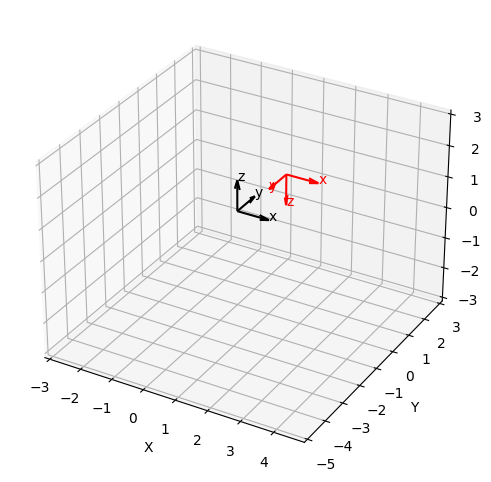

In [105]:
# Vector coordinates
v = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

# Origin coordinates
origin = np.array([[0,0,0],
                   [0,0,0],
                   [0,0,0]])

# Traslation vector
translation = np.array([[1],
                        [1],
                        [1]])

# Apply transformation
apply_rotation_translation(v,origin,0,0,180,translation,["x","y","z"],[-3,4.75,-5,3,-3,3])

<font color='red'>**Expected output:**  </font>

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/example_transformation_2.png" width="300" align="left"/>
</center>

This is strongly related to a camera system in a videogame. For example, it could represent a movement of the player where they jump and rotate. That is, we are moving the `CAMERA` reference system within the `WORLD` one. Next, **you are asked to** simulate the following camera movements in such a context, using the previously defined method.

- a) Walk **forward 2 units** and look to the **right 90 degrees**

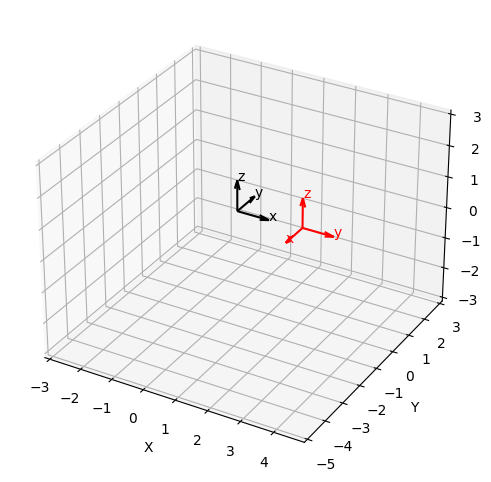

In [129]:
# Write your code here!
# Vector an origin coordinates
v = np.array([[1,0,0],[0,1,0],[0,0,1]])

origin = np.array([[0,0,0],[0,0,0],[0,0,0]])

# Movements
yaw = -90 
pitch = 0
roll = 0

translation = np.array([[1],[2],[-1.25]])

# Apply transformation (Consideramos eje x la dirección de movimiento del jugador)
apply_rotation_translation(v,origin,yaw,pitch,roll,translation,["x","y","z"],[-3,4.75,-5,3,-3,3])

<font color='red'>**Expected output:**  </font>

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/ch81_a6_result_a.png" width="300" align="left"/>
</center>

- b) While you are walking (**two units forward**), jump (our character can **jump one unit of height**), and look **45 degrees to the floor** (e.g. jumping an obstacle).

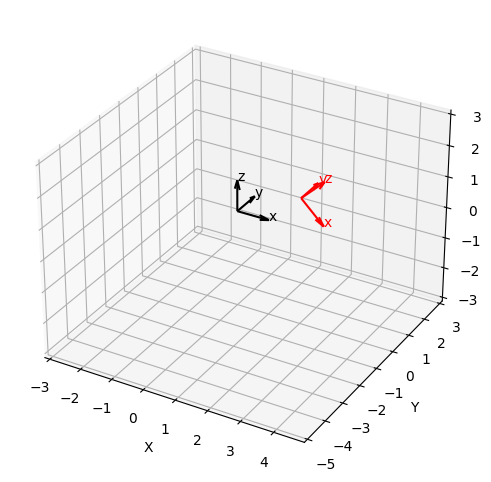

In [130]:
# Write your code here!
# Vector coordinates
v = np.array([[1,0,0],[0,1,0],[0,0,1]])

# Origin coordinates
origin = np.array([[0,0,0],[0,0,0],[0,0,0]])

# Movements
yaw = 0 
pitch = 45
roll = 0

translation = np.array([[2],[0],[1]]) # Suponemos que partimos de la posición inicial

# Apply transformation
apply_rotation_translation(v,origin,0,45,0,translation,["x","y","z"],[-3,4.75,-5,3,-3,3])

<font color='red'>**Expected output:**  </font>

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/ch81_a6_result_b.png" width="300" align="left"/>
</center>

## **8.1.2 Homogenous transformations**

Homogenous (also called projective) transformations are linear transformations (i.e. matrix multiplications) **between homogenous coordinates** (vectors). Such coordinates are obtained from Cartesian (inhomogenous) vectors by **extending them with a non-negative number** (typically 1, for convenience).

Although we are going to explain homogenous transformations using the 3D space, **this is generalizable to any other number of dimensions**.

A 3D vector (or a 3D point) in **inhomogenous coordinates** looks like:

$$\mathbf{x} = \begin{bmatrix} x \\ y \\ z \end{bmatrix} \in \mathbb{R}^3$$

while the same vector in **homogenous coordinates** has the form (note the tilde in the notation):

$$\mathbf{\tilde{x}} = \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix} \equiv \begin{bmatrix} \lambda x \\ \lambda y \\ \lambda z \\ \lambda \end{bmatrix} \in \mathbb{R}^4$$

We can go back by dividing the three first coordinates by the fourth:$\\[5pt]$

$$\mathbf{\tilde{x}} = \begin{bmatrix} \lambda x \\ \lambda y \\ \lambda z \\ \lambda \end{bmatrix} \Rightarrow \mathbf{x} = \begin{bmatrix} x/\lambda \\ y/\lambda \\ z/\lambda \end{bmatrix}$$

As a consecuence of $\lambda$, **any transformation in homogenous coordinates holds for any scaled matrix**:
  
$$
\begin{bmatrix} x_1' \\ x_2' \\ x_3' \\ x_4' \end{bmatrix} 
= 
\begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \\ p_{41} & p_{42} & p_{43} & p_{44} \end{bmatrix} 
\begin{bmatrix} \lambda x_1 \\ \lambda x_2 \\ \lambda x_3 \\ \lambda \end{bmatrix} 
= 
\lambda 
\begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \\ p_{41} & p_{42} & p_{43} & p_{44} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ 1 
\end{bmatrix} 
$$

Then, the following transfomations are equivalent:

$$
\begin{bmatrix} 1 & -3 & 2 & 5 \\ 4 & 2 & 1 & 2 \\ 4 & -1 & 0 & 2 \\ -6 & 2 & 1 & 2 
\end{bmatrix} 
\equiv 
\lambda 
\begin{bmatrix} 1 & -3 & 2 & 5 \\ 4 & 2 & 1 & 2 \\ 4 & -1 & 0 & 2 \\ -6 & 2 & 1 & 2 
\end{bmatrix}
$$

**This indetermination is typically handled by fixing one entry of the matrix**, (e.g. $p_{44} = 1$). Also, these matrices must be non-singular (Rank = 4).

### **Utility of homonogeneus transformations**

Now that we know how homogenous coordinates and homogenous transformations works, it's time for understanding **why this is interesting**.

For now, we were performing complete transformations (rotations and translations) by using a rotation matrix and adding a translation vector to the rotated points ($\mathbf{p}' = \mathbf{R}\mathbf{p} + \mathbf{t}$).

The problem of this transformation is that the **concatenation of transformations** when a sequence of transformations has to be done becomes a mess:

$\hspace{2cm} \mathbf{p}' = \mathbf{R}_1\mathbf{p}+\mathbf{t}_1 \\ \hspace{2cm} \mathbf{p}'' = \mathbf{R}_2\mathbf{p}' + \mathbf{t}_2 = \mathbf{R}_2(\mathbf{R}_1\mathbf{p}+\mathbf{t}_1) + \mathbf{t}_2 = \mathbf{R}_2\mathbf{R}_1\mathbf{p} + \mathbf{R}_2\mathbf{t}_1 + \mathbf{t}_2$

In the context of our problem, every time we move the camera we have to concatenate a new transformation. Imagine this in a first-person videogame, where a transformation of the coordinate system is needed in every frame. In just a second more than 60 concatenations should be computed.

**What happens if we use homogenous coordinates?**

We can express a transformation consisting of a rotation + translation using only a matrix multiplication:

$$ \mathbf{\tilde{p}}' = \mathbf{T}_1\mathbf{\tilde{p}} \Rightarrow \begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_x\\ r_{21} & r_{22} & r_{23} & t_y \\ r_{31} & r_{32} & r_{33} & t_z \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix} = \begin{bmatrix} r_{11}x + r_{12}y + r_{13}z + t_x \\ r_{21}x + r_{22}y + r_{23}z + t_y \\ r_{31}x + r_{32}y + r_{33}z + t_z \\ 0x + 0y + 0z + 1 \end{bmatrix} = \begin{bmatrix} r_{11}x + r_{12}y + r_{13}z \\ r_{21}x + r_{22}y + r_{23}z \\ r_{31}x + r_{32}y + r_{33}z \\ 1 \end{bmatrix} +  \begin{bmatrix} t_x \\ t_y \\ t_z \\ 0 \end{bmatrix}$$

Note that the 3$\times$3 left-top submatrix of the $\mathbf{T}_1$ matrix is a rotation matrix while the last column contains the desired translation. 
This is the main reason for using homogeneous coordinates, look **how concatenation is applied now!**

$\hspace{02cm}  \mathbf{\tilde{p}}' = \mathbf{T}_1\mathbf{\tilde{p}} \\
 \hspace{2cm}  \mathbf{\tilde{p}}'' = \mathbf{T}_2\mathbf{\tilde{p}}' = \mathbf{T}_2\mathbf{T}_1\mathbf{\tilde{p}}$
 
**Concatenation becomes much easier**, being only consecutive matrix multiplications (remember that, nowadays, matrix multiplications are very fast using GPUs).

**Let's play a bit with homogeneous coordinates**. We are going to apply a homogenous transformation to a 3D object (a set of 3D-points, in fact). For this, we have defined `data`$\in \mathbb{R}^4$, a **matrix containing more than 3k points in homogenous coordinates**:

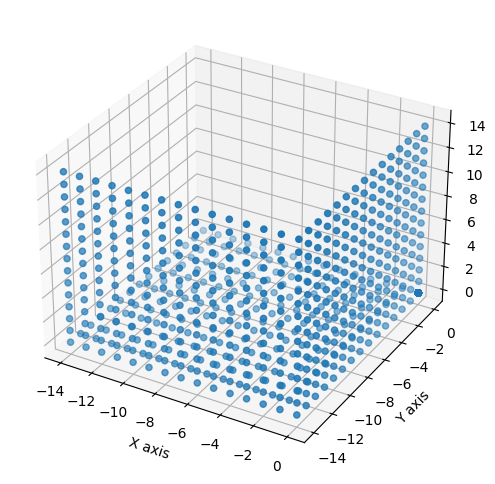

In [131]:
# Load data
data = np.load("/gdrive/My Drive/Colab Notebooks/Chapter 8. Image Formation/data/data.npy")

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = plt.axes(projection='3d')

# Name axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Plot points
ax.scatter(data[0,:], data[1,:], data[2,:])

fig.show()

### **<font color="green"><b>ASSIGNMENT #7: Homogeneous transformations method</b></font>**

Now, create a new method called `apply_homogeneous_transformation()` that builds a homogeneous matrix from some `yaw`, `pitch` and `roll` values as well as a translation vector and applies it to the input data matrix `data`. 

> <font color="orange">Note that we are not transforming vectors, but points, so use [`scatter()`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) instead of `quiver()`.</font>

In [134]:
# ASSIGNMENT #7
def apply_homogeneous_transformation(data, yaw, pitch, roll, translation):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            data        : [numpy array] input set of points to transform
            yaw         : [float] degrees to rotate the coordinate system around the 'Z' axis 
            pitch       : [float] degrees to rotate the coordinate system around the 'Y' axis 
            roll        : [float] degrees to rotate the coordinate system around the 'X' axis 
            translation : [numpy array] column vector containing the translation for each axis

        Returns: 
            None
    """   
    # Write your code here!
    
    rot_x=radians(roll)
    rot_y=radians(pitch)
    rot_z=radians(yaw)

    Rx=np.asarray([[1,0,0],[0,cos(rot_x),-sin(rot_x)],[0,sin(rot_x),cos(rot_x)]])
    Ry=np.asarray([[cos(rot_y),0,sin(rot_y)],[0,1,0],[-sin(rot_y),0,cos(rot_y)]])
    Rz=np.asarray([[cos(rot_z),-sin(rot_z),0],[sin(rot_z),cos(rot_z),0],[0,0,1]])

    Rtrans=Rz@Ry@Rx

    Rhom=np.zeros((4,4))
    Rhom[0:3, 0:3] = Rtrans
    Rhom[0:3, 3] = translation
    Rhom[3,3] = 1
    
    data_trans=Rhom@data

    # Plot
    fig = plt.figure()

    # Prepare figure for 3D data
    ax = plt.axes(projection='3d')

    # Name axes
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    # Plot points
    ax.scatter(data_trans[0,:], data_trans[1,:], data_trans[2,:])

    fig.show()

Now apply the following transformation to the object previously loaded:

- **Yaw** rotation: $45^\circ$
- **Pitch** rotation: $-60^\circ$
- **Roll** rotation: $20^\circ$
- **Translation**:
    - *X*-axis: $20$ units
    - *Y*-axis: $20$ units
    - *Z*-axis: $40$ units

Remember that this has to be done using a homogenous transformation (one unique matrix multiplication).

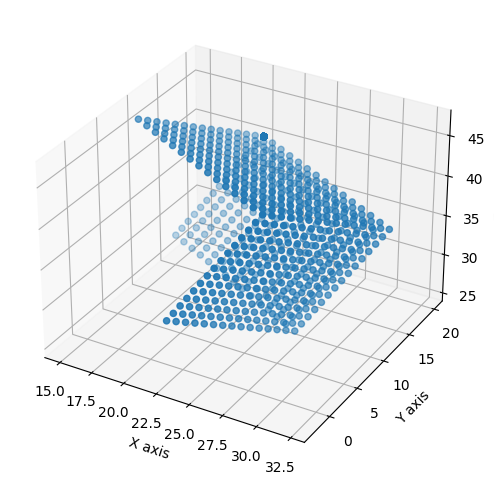

In [135]:
# Load data
data = np.load("/gdrive/My Drive/Colab Notebooks/Chapter 8. Image Formation/data/data.npy")

# Write your code here!
# Apply transformation
apply_homogeneous_transformation(data, 45, -60, 20, [20,20,40])

##### **<font color=red><b>Expected output</b></font>**

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/example_transformation_3b.png" width="500" align="left"/>
</center>

By doing these transformations, our graphic engine could represent moving objects in the `WORLD` when the player is still (e.g. flying birds, cars, other players, etc.). 

### **<font color="green"><b>ASSIGNMENT #8: How the player sees the world</b></font>**

One final example, consider the following image, in where our character **Joel** is looking at a dystopian, post-apocalyptic scenario. 

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch8/insert/tlou.png" width="1200" align="center"/>
</center>

The `WORLD` reference system is displayed in orange and labeled with {$\mathbf{W}$} while the reference system of the character's view is displayed in red and labeled as {$\mathbf{C}$}. We know that the position and orientation of {$\mathbf{C}$} w.r.t. {$\mathbf{W}$} is given by a *yaw* angle of -45º, a *roll* angle of -90 and a translation of \[0.0,-4.0,1.2\] meters in \[$x$,$y$,$z$\] axes, respectively. Knowing that the coordinates of the point $\mathbf{p}^W$ in the world are \[30.0,1.2,0.5\] meters, could you compute what are its coordinates w.r.t our character's point of view ($\mathbf{p}^C$)? As we will see in future notebooks, knowing such coordinates is vital to get the position of the 3D point **in the image** that Joel would see if this game were in first-person (fortunately it's not!).

In [141]:
# ASSIGNMENT #8
# Write your code here!

# p position respct to W
p = np.asarray([[30.0], [1.2], [0.5],[1]])

# C position respct to W
translation = np.asarray([[0.0, -4.0, 1.2]])

rot_z = radians(-45)
rot_y = radians(0)
rot_x = radians(-90)

Rx=np.asarray([[1,0,0],[0,cos(rot_x),-sin(rot_x)],[0,sin(rot_x),cos(rot_x)]])
Ry=np.asarray([[cos(rot_y),0,sin(rot_y)],[0,1,0],[-sin(rot_y),0,cos(rot_y)]])
Rz=np.asarray([[cos(rot_z),-sin(rot_z),0],[sin(rot_z),cos(rot_z),0],[0,0,1]])

rotation = Rz@Ry@Rx

# C respect W Transformation
trans = np.zeros((4,4))
trans[0:3, 0:3] = rotation
trans[0:3, 3] = translation
trans[3,3] = 1

# W respect C Transformation
trans = np.linalg.inv(trans)

# P respect C 
p_resp_C = trans@p

print("Point coordinates: ",np.transpose(p_resp_C))

Point coordinates:  [[17.53624817  0.7        24.8901587   1.        ]]


##### **<font color=red><b>Expected output</b></font>**
Point coordinates: $[17.54, 0.70, 24.89, 1]$

## **Conclusion**

Awesome!

This was an introductory notebook covering some mathematical tools that are the building blocks for image formation. We made an excellent work trying to master these maths and we have learnt:

- How to plot vectors and perform products between them.
- The ideas behind the linear transformation of vectors.
- How to rotate and translate points or vectors using Cartesian coordinates.
- The principles of homogeneous coordinates.
- How to rotate and translate points or vectors using homogeneous coordinates.